### Gustavo Silveira Dias

In [ ]:
import numpy as np 
from skimage import util, color, exposure

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

SMALL_SIZE = 7
matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('axes', titlesize=SMALL_SIZE)

## Carregando uma imagem

In [16]:
img_gray = plt.imread('Aranha.jpg')

# Prin das informações da imagem
print(img_gray.shape, img_gray.dtype, img_gray.min(), img_gray.max())

(851, 1280, 3) uint8 0 255


In [17]:
# Inteiro de 8 bits sem sinal
# Ajuda na função de transofrmação pra conseguir plotar as imagens e para fazer operações

r = np.array(np.linspace(0, 255, 256))

# Float
r_ = np.array(np.linspace(0, 1, 256))

In [18]:
gama_02 = 0.2

util.img_as_ubyte(util.img_as_float(img_gray) ** gama_02)

# Imamgem Escura
gama_01 = 5

# Função de transformação
img_gama_01 = util.img_as_ubyte(util.img_as_float(img_gray) ** gama_01)

# Baixo contraste
# Transformação linear
img_gray_baixo = (img_gray * 0.25 + 95).astype(np.uint8)
s_baixo = (r * 0.25 + 95)

In [19]:
print(img_gray_baixo.min(), img_gray_baixo.max())

# Alto contraste (transformação linear)
img_gray_alto = np.clip((img_gray.astype(np.float32) * 2 - 255), 0, 255).astype(np.uint8)
s_alto = np.clip((r * 2 - 255), 0, 255)

print(img_gray_alto.min(), img_gray_alto.max())

# Equalização de histograma
img_eq = exposure.equalize_hist(img_gray)
img_eq = util.img_as_ubyte(img_eq)
s_eq = exposure.equalize_hist(r_)
s_eq = util.img_as_ubyte(s_eq)

print(img_eq.min(), img_eq.max())

95 158
0 255
0 255


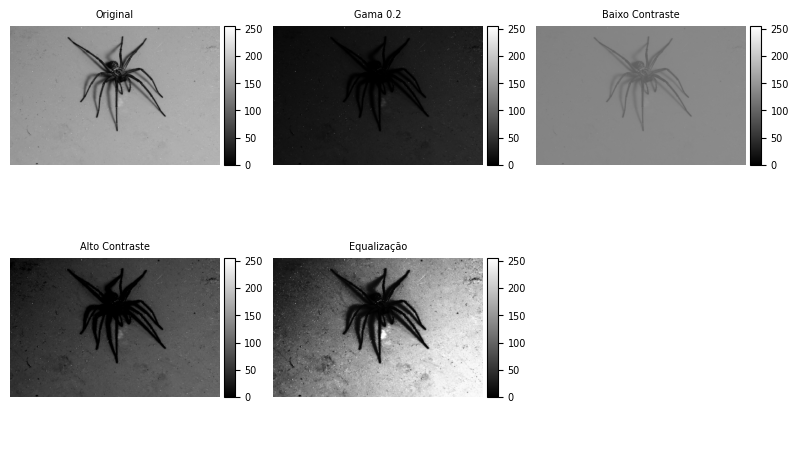

In [20]:
# Plotando as imagens
fig, ax = plt.subplots(2, 3, figsize=(8, 5))
ax = ax.ravel()
images = [img_gray, img_gama_01, img_gray_baixo, img_gray_alto, img_eq]
titles = ['Original', 'Gama 0.2', 'Baixo Contraste', 'Alto Contraste', 'Equalização']

for i in range(len(images)):
    im = ax[i].imshow(images[i], cmap='gray', vmin=0, vmax=255)
    ax[i].set_title(titles[i])
    ax[i].axis('off')
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im, cax=cax, orientation='vertical')

ax[-1].axis('off')
plt.tight_layout()
plt.show()


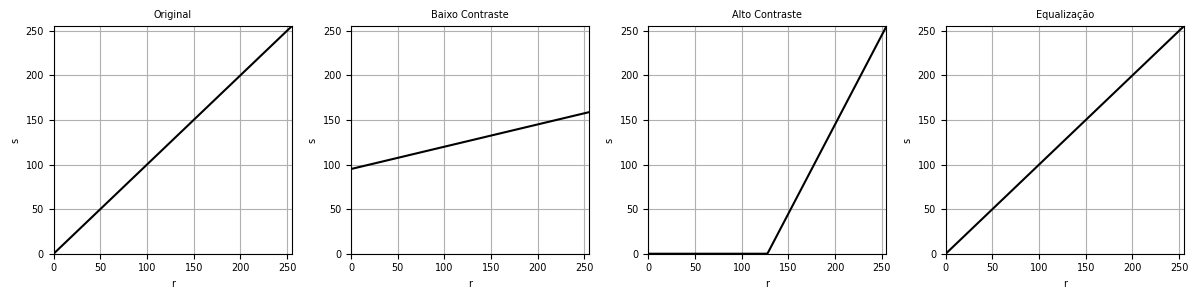

In [21]:



# Plotando as funções de transformação
fig, ax = plt.subplots(1, 4, figsize=(12, 3))  # <<-- Corrigido para 4 gráficos
ax = ax.ravel()

s = [r, s_baixo, s_alto, s_eq]
titles = ['Original', 'Baixo Contraste', 'Alto Contraste', 'Equalização']

for i in range(len(s)):
    ax[i].plot(r, s[i], 'k')
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('r')
    ax[i].set_ylabel('s')
    ax[i].set_xlim(0, 255)
    ax[i].set_ylim(0, 255)
    ax[i].grid()

plt.tight_layout()
plt.show()
